In [1]:
from fastai.basics import *
from fastai.medical.imaging import *

In [146]:
from fastai.vision.all import *

# Scratch Work

In [2]:
path = Path('./data/')

In [5]:
path.ls()

(#6) [Path('data/train'),Path('data/sample_submission.csv'),Path('data/test.csv'),Path('data/test'),Path('data/train.csv'),Path('data/.ipynb_checkpoints')]

In [4]:
path_train = path/'train'
fnames_train = path_train.ls()
fnames_train[:5].attrgot('name')

(#5) ['ID00073637202198167792918','ID00376637202297677828573','ID00408637202308839708961','ID00355637202295106567614','ID00423637202312137826377']

In [6]:
fnames_train = get_dicom_files(path, folders='train')
fnames_test = get_dicom_files(path, folders='test')

In [7]:
fnames_train[0:5].attrgot('name')

(#5) ['299.dcm','27.dcm','154.dcm','271.dcm','129.dcm']

In [8]:
df = pd.read_csv(path/'train.csv')
df.head()

Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

In [9]:
df[df['Patient'] == 'ID00007637202177411956430']

Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker
5  ID00007637202177411956430     17  2101  52.868646   79  Male     Ex-smoker
6  ID00007637202177411956430     29  2000  50.327126   79  Male     Ex-smoker
7  ID00007637202177411956430     41  2064  51.937594   79  Male     Ex-smoker
8  ID00007637202177411956430     57  2057  51.761449   79  Male     Ex-smoker

In [10]:
path_train.ls()

(#176) [Path('data/train/ID00073637202198167792918'),Path('data/train/ID00376637202297677828573'),Path('data/train/ID00408637202308839708961'),Path('data/train/ID00355637202295106567614'),Path('data/train/ID00423637202312137826377'),Path('data/train/ID00047637202184938901501'),Path('data/train/ID00234637202261078001846'),Path('data/train/ID00339637202287377736231'),Path('data/train/ID00283637202278714365037'),Path('data/train/ID00062637202188654068490')...]

In [15]:
test_patient_files = (path_train/'ID00007637202177411956430').ls().sorted()

In [13]:
test_patient = path_train/'ID00007637202177411956430'

In [16]:
test_patient_files[0].dcmread()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12297650151329871895440507938349160734
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

In [17]:
test_patient_files[1].dcmread()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.37611372879908126511187998276199853341
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.37611372879908126511187998276199853341
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

In [25]:
fnames_train = get_dicom_files(path, folders='train')
fnames_test = get_dicom_files(path, folders='test')

In [27]:
df_train = pd.DataFrame.from_dicoms(fnames_train, px_summ=True)

{'SpecificCharacterSet': 'ISO_IR 100', 'ImageType': 'ORIGINAL', 'SOPInstanceUID': '2.25.64514724747168860136334805065530013917', 'Modality': 'CT', 'Manufacturer': 'Philips', 'ManufacturerModelName': 'Brilliance 64', 'PatientName': 'ID00052637202186188008618', 'PatientID': 'ID00052637202186188008618', 'PatientSex': '', 'DeidentificationMethod': 'Table;', 'BodyPartExamined': 'Chest', 'SliceThickness': "2.0", 'KVP': "120.0", 'SpacingBetweenSlices': "1.0", 'GantryDetectorTilt': "0.0", 'TableHeight': "113.0", 'RotationDirection': 'CW', 'XRayTubeCurrent': "205", 'ConvolutionKernel': 'L', 'PatientPosition': 'FFS', 'StudyInstanceUID': '2.25.117819945056735028137746624204067820767', 'SeriesInstanceUID': '2.25.53988073427766171475294626129168160339', 'StudyID': '', 'InstanceNumber': "4", 'ImagePositionPatient': "-255.0", 'ImageOrientationPatient': "1.0", 'FrameOfReferenceUID': '2.25.76808817788063819317722283654496424658', 'PositionReferenceIndicator': '', 'SliceLocation': "-229.9", 'SamplesPerP

{'SpecificCharacterSet': 'ISO_IR 100', 'ImageType': 'ORIGINAL', 'SOPInstanceUID': '2.25.9463146288515712963633997841404523038', 'Modality': 'CT', 'Manufacturer': 'SIEMENS', 'ManufacturerModelName': 'Sensation 64', 'PatientName': 'ID00011637202177653955184', 'PatientID': 'ID00011637202177653955184', 'PatientSex': '', 'DeidentificationMethod': 'Table;', 'BodyPartExamined': 'Chest', 'SliceThickness': "1.0", 'KVP': "120.0", 'DistanceSourceToDetector': "1040.0", 'DistanceSourceToPatient': "570.0", 'GantryDetectorTilt': "0.0", 'TableHeight': "159.0", 'RotationDirection': 'CW', 'XRayTubeCurrent': "492", 'GeneratorPower': "34", 'FocalSpots': "1.2", 'ConvolutionKernel': 'B70f', 'PatientPosition': 'HFS', 'StudyInstanceUID': '2.25.58893941013546715314915610943575006591', 'SeriesInstanceUID': '2.25.47956916717451292264780760321974497731', 'StudyID': '', 'InstanceNumber': "1", 'ImagePositionPatient': "-144.2099609375", 'ImageOrientationPatient': "1.0", 'FrameOfReferenceUID': '2.25.42475716911114150

In [ ]:
# There were about 32 files that were corrupt so we will ignore them

In [28]:
df_train.to_feather('df_train.fth')

ArrowInvalid: ('Could not convert ID00073637202198167792918 with type PersonName: did not recognize Python value type when inferring an Arrow data type', 'Conversion failed for column PatientName with type object')

In [34]:
df_train.head()

SpecificCharacterSet ImageType  \
0           ISO_IR 100  ORIGINAL   
1           ISO_IR 100  ORIGINAL   
2           ISO_IR 100  ORIGINAL   
3           ISO_IR 100  ORIGINAL   
4           ISO_IR 100  ORIGINAL   

                                 SOPInstanceUID Modality Manufacturer  \
0   2.25.22035166574948871471422134731562249097       CT      SIEMENS   
1  2.25.126819103927320311061084987976255322281       CT      SIEMENS   
2  2.25.148020294841960737158168849658730444189       CT      SIEMENS   
3  2.25.103421222682532091240839224574835918487       CT      SIEMENS   
4   2.25.49537242277733628521310764338383376780       CT      SIEMENS   

  ManufacturerModelName                PatientName                  PatientID  \
0          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
1          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
2          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
3          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
4          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   

  PatientSex DeidentificationMethod  ... PixelPaddingValue  MultiWindowCenter  \
0                            Table;  ...               NaN                NaN   
1                            Table;  ...               NaN                NaN   
2                            Table;  ...               NaN                NaN   
3                            Table;  ...               NaN                NaN   
4                            Table;  ...               NaN                NaN   

   WindowCenter1  MultiWindowWidth  WindowWidth1  SpatialResolution  \
0            NaN               NaN           NaN                NaN   
1            NaN               NaN           NaN                NaN   
2            NaN               NaN           NaN                NaN   
3            NaN               NaN           NaN                NaN   
4            NaN               NaN           NaN                NaN   

   MultiConvolutionKernel ConvolutionKernel1  ImageType7  ImageType8  
0                     NaN                NaN         NaN         NaN  
1                     NaN                NaN         NaN         NaN  
2                     NaN                NaN         NaN         NaN  
3                     NaN                NaN         NaN         NaN  
4                     NaN                NaN         NaN         NaN  

[5 rows x 99 columns]

In [39]:
df_temp = df_train.astype({"PatientName": str})

In [48]:
Path('.').ls()

(#7) [Path('df_train.fth'),Path('Untitled.ipynb'),Path('data'),Path('df_test.fth'),Path('Creating Metadata DataFrame.ipynb'),Path('.git'),Path('.ipynb_checkpoints')]

In [45]:
# make sure the feather df is good
feather_train = pd.read_feather('df_train.fth')
feather_train.head()

SpecificCharacterSet ImageType  \
0           ISO_IR 100  ORIGINAL   
1           ISO_IR 100  ORIGINAL   
2           ISO_IR 100  ORIGINAL   
3           ISO_IR 100  ORIGINAL   
4           ISO_IR 100  ORIGINAL   

                                 SOPInstanceUID Modality Manufacturer  \
0   2.25.22035166574948871471422134731562249097       CT      SIEMENS   
1  2.25.126819103927320311061084987976255322281       CT      SIEMENS   
2  2.25.148020294841960737158168849658730444189       CT      SIEMENS   
3  2.25.103421222682532091240839224574835918487       CT      SIEMENS   
4   2.25.49537242277733628521310764338383376780       CT      SIEMENS   

  ManufacturerModelName                PatientName                  PatientID  \
0          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
1          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
2          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
3          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   
4          Sensation 16  ID00073637202198167792918  ID00073637202198167792918   

  PatientSex DeidentificationMethod  ... PixelPaddingValue  MultiWindowCenter  \
0                            Table;  ...               NaN                NaN   
1                            Table;  ...               NaN                NaN   
2                            Table;  ...               NaN                NaN   
3                            Table;  ...               NaN                NaN   
4                            Table;  ...               NaN                NaN   

   WindowCenter1  MultiWindowWidth  WindowWidth1  SpatialResolution  \
0            NaN               NaN           NaN                NaN   
1            NaN               NaN           NaN                NaN   
2            NaN               NaN           NaN                NaN   
3            NaN               NaN           NaN                NaN   
4            NaN               NaN           NaN                NaN   

   MultiConvolutionKernel ConvolutionKernel1  ImageType7  ImageType8  
0                     NaN               None        None        None  
1                     NaN               None        None        None  
2                     NaN               None        None        None  
3                     NaN               None        None        None  
4                     NaN               None        None        None  

[5 rows x 99 columns]

In [40]:
df_temp.to_feather('df_train.fth')

In [46]:
df_test = pd.DataFrame.from_dicoms(fnames_test, px_summ=True)
df_test_temp = df_test.astype({"PatientName": str})
df_test_temp.to_feather('df_test.fth')

In [49]:
df_feather = pd.read_feather('df_test.fth')
df_feather.head()

SpecificCharacterSet ImageType  \
0           ISO_IR 100  ORIGINAL   
1           ISO_IR 100  ORIGINAL   
2           ISO_IR 100  ORIGINAL   
3           ISO_IR 100  ORIGINAL   
4           ISO_IR 100  ORIGINAL   

                                 SOPInstanceUID Modality Manufacturer  \
0  2.25.102607910924469594990386503689409406940       CT      Philips   
1   2.25.53430042318572729200877974069840087577       CT      Philips   
2  2.25.104519612107538666585796796210226179200       CT      Philips   
3    2.25.1423061522518930422076443596230398416       CT      Philips   
4  2.25.154953523726288461384335598659206346902       CT      Philips   

  ManufacturerModelName                PatientName                  PatientID  \
0         Brilliance 64  ID00423637202312137826377  ID00423637202312137826377   
1         Brilliance 64  ID00423637202312137826377  ID00423637202312137826377   
2         Brilliance 64  ID00423637202312137826377  ID00423637202312137826377   
3         Brilliance 64  ID00423637202312137826377  ID00423637202312137826377   
4         Brilliance 64  ID00423637202312137826377  ID00423637202312137826377   

  PatientSex DeidentificationMethod  ... FocalSpots  PatientOrientation  \
0                            Table;  ...        NaN                None   
1                            Table;  ...        NaN                None   
2                            Table;  ...        NaN                None   
3                            Table;  ...        NaN                None   
4                            Table;  ...        NaN                None   

   RescaleType  RevolutionTime  SingleCollimationWidth  TotalCollimationWidth  \
0         None             NaN                     NaN                    NaN   
1         None             NaN                     NaN                    NaN   
2         None             NaN                     NaN                    NaN   
3         None             NaN                     NaN                    NaN   
4         None             NaN                     NaN                    NaN   

  TableSpeed  TableFeedPerRotation SpiralPitchFactor PixelPaddingValue  
0        NaN                   NaN               NaN               NaN  
1        NaN                   NaN               NaN               NaN  
2        NaN                   NaN               NaN               NaN  
3        NaN                   NaN               NaN               NaN  
4        NaN                   NaN               NaN               NaN  

[5 rows x 76 columns]

# Create a Metadata DataFrame
In this section I will create a metadata DataFrame from the csv files. The process is:
* Get all DICOM files from train and test
* create DataFrame for test and train
* convert PatientNAme column to str
* save df_train and df_test in feather format

In [ ]:
# get file names for train and test
fnames_train = get_dicom_files(path, folders='train')
fnames_test = get_dicom_files(path, folders='test')

In [ ]:
# create train DF, convert col type and
# save as feather
df_train = pd.DataFrame.from_dicoms(fnames_train, px_summ=True)
df_train_temp = df_train.astype({"PatientName": str})
df_train_temp.to_feather('df_train.fth')

In [ ]:
# do the same for test
df_test = pd.DataFrame.from_dicoms(fnames_test, px_summ=True)
df_test_temp = df_test.astype({"PatientName": str})
df_test_temp.to_feather('df_test.fth')

In [10]:
# create labels df -> feather
data_df = pd.read_csv(path/'train.csv')
data_df.head()

Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

In [12]:
data_df[data_df.Patient == 'ID00007637202177411956430']

Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker
5  ID00007637202177411956430     17  2101  52.868646   79  Male     Ex-smoker
6  ID00007637202177411956430     29  2000  50.327126   79  Male     Ex-smoker
7  ID00007637202177411956430     41  2064  51.937594   79  Male     Ex-smoker
8  ID00007637202177411956430     57  2057  51.761449   79  Male     Ex-smoker

In [7]:
(path/'train'/'ID00007637202177411956430').ls().sorted()

(#30) [Path('data/train/ID00007637202177411956430/1.dcm'),Path('data/train/ID00007637202177411956430/10.dcm'),Path('data/train/ID00007637202177411956430/11.dcm'),Path('data/train/ID00007637202177411956430/12.dcm'),Path('data/train/ID00007637202177411956430/13.dcm'),Path('data/train/ID00007637202177411956430/14.dcm'),Path('data/train/ID00007637202177411956430/15.dcm'),Path('data/train/ID00007637202177411956430/16.dcm'),Path('data/train/ID00007637202177411956430/17.dcm'),Path('data/train/ID00007637202177411956430/18.dcm')...]

In [46]:
records_df = data_df.groupby(by='Patient')['Weeks'].count().reset_index(drop=False)

In [47]:
records_df.head()

Patient  Weeks
0  ID00007637202177411956430      9
1  ID00009637202177434476278      9
2  ID00010637202177584971671      9
3  ID00011637202177653955184      9
4  ID00012637202177665765362      9

In [51]:
(path/'train'/'ID00007637202177411956430').ls()

(#30) [Path('data/train/ID00007637202177411956430/27.dcm'),Path('data/train/ID00007637202177411956430/15.dcm'),Path('data/train/ID00007637202177411956430/18.dcm'),Path('data/train/ID00007637202177411956430/2.dcm'),Path('data/train/ID00007637202177411956430/5.dcm'),Path('data/train/ID00007637202177411956430/4.dcm'),Path('data/train/ID00007637202177411956430/21.dcm'),Path('data/train/ID00007637202177411956430/16.dcm'),Path('data/train/ID00007637202177411956430/25.dcm'),Path('data/train/ID00007637202177411956430/22.dcm')...]

In [59]:
dcms_fns = get_dicom_files(path/'train'/'ID00007637202177411956430')
dcms = L(Path(o).dcmread() for o in dcms_fns)

1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file


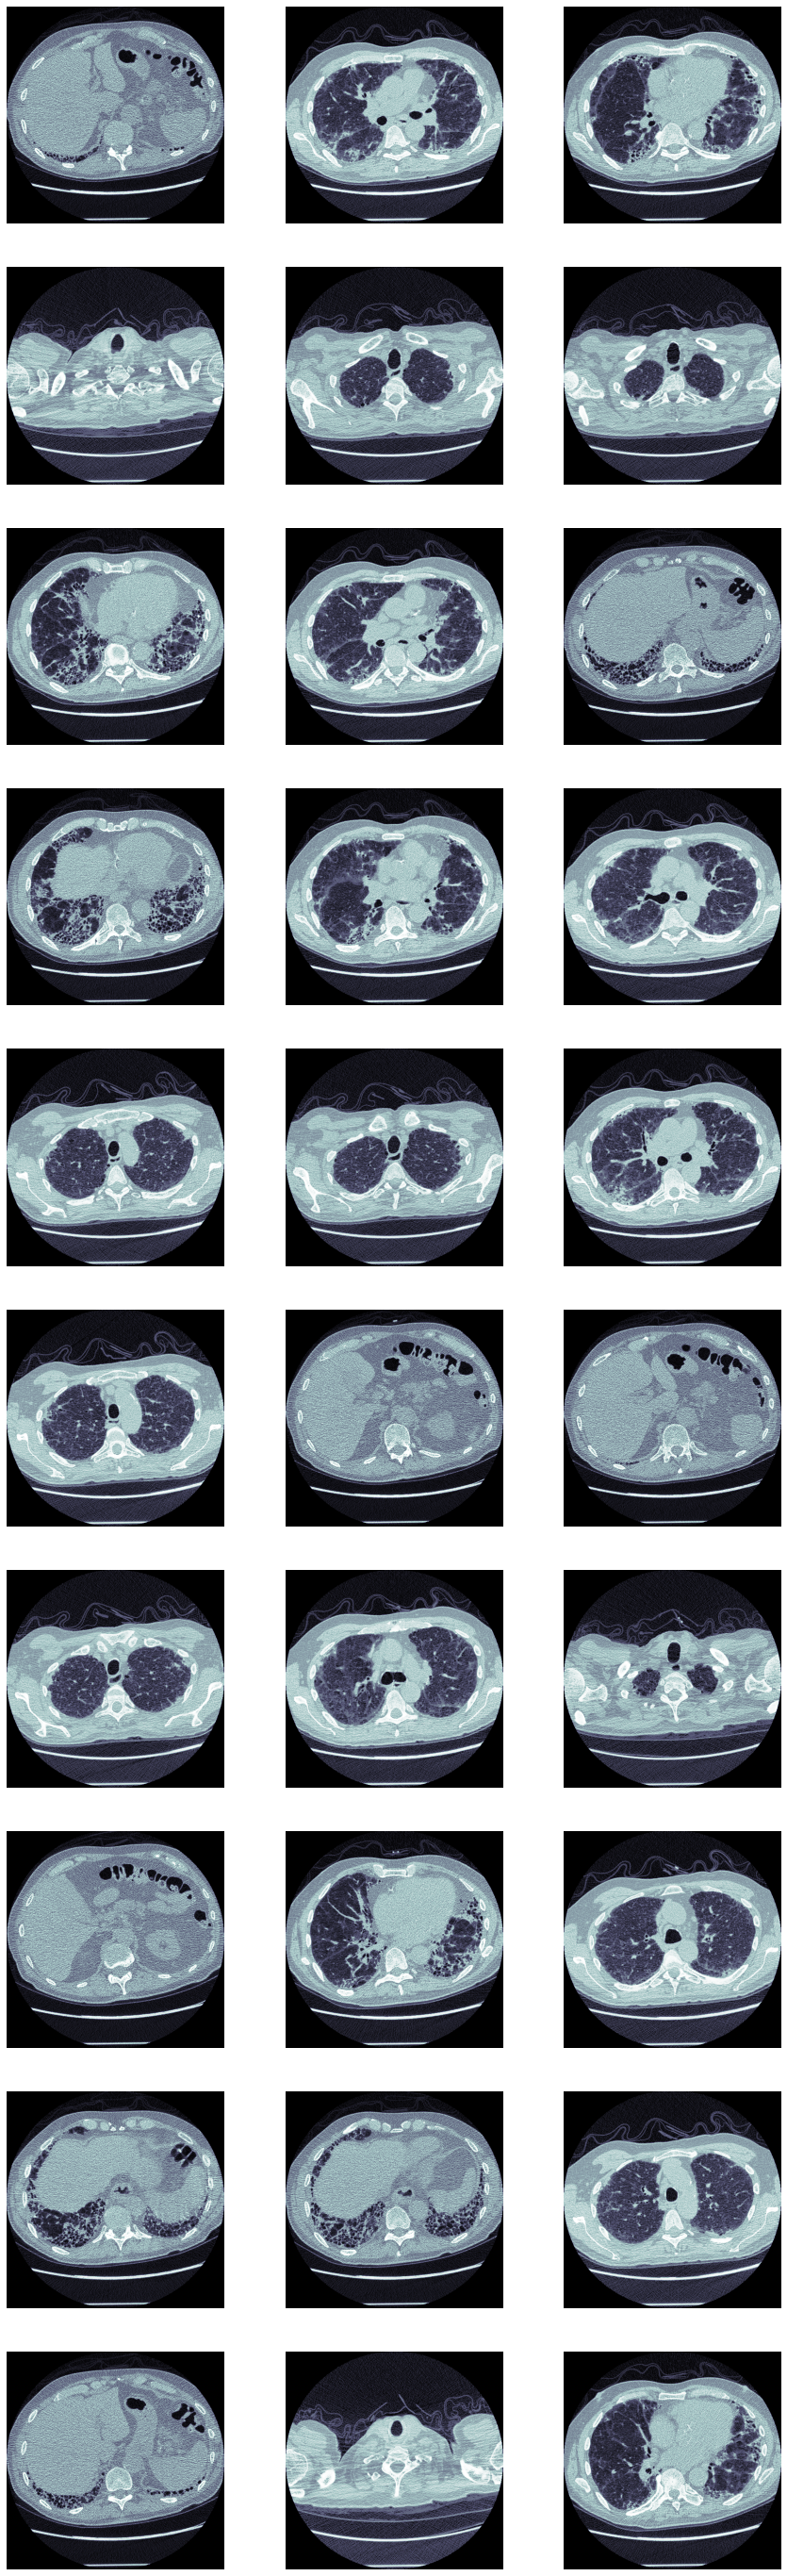

In [69]:
_,axs = subplots(10,3, imsize=5)
for i,ax in enumerate(axs.flat):
    dcms[i].show(dicom_windows.lungs, ax=ax)

(array([55772.,     0.,     0.,     0., 86596., 55223., 59378.,  3672.,
         1393.,   110.]),
 array([-2000. , -1500.8, -1001.6,  -502.4,    -3.2,   496. ,   995.2,
         1494.4,  1993.6,  2492.8,  2992. ]),
 <BarContainer object of 10 artists>)

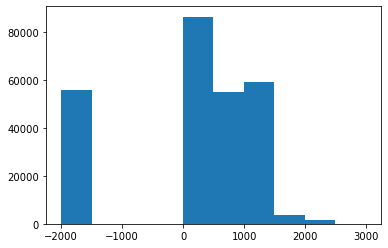

In [70]:
dcm = dcms[2]
d = dcm.pixel_array
plt.hist(d.flatten())

In [75]:
dcms[2].BitsStored

16

1 frame per file
1 frame per file
1 frame per file
1 frame per file


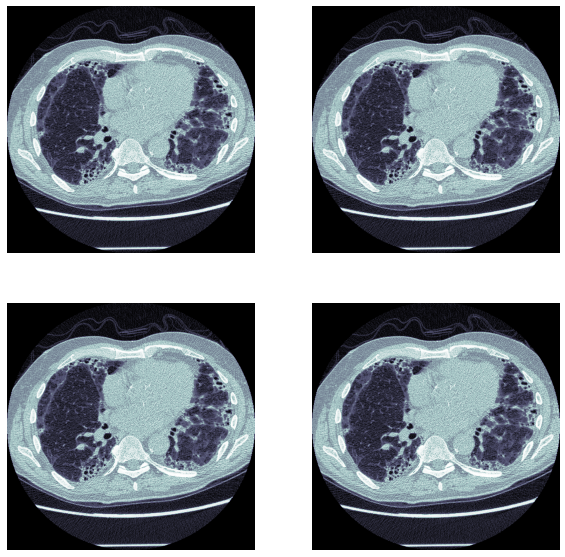

In [85]:
_,axs = subplots(2,2, imsize=5)
dcm.show(ax=axs[0,0]);
dcm.show(dicom_windows.brain, ax=axs[0,1])
dcm.show(dicom_windows.lungs, ax=axs[1,0])
dcm.show(dicom_windows.subdural, ax=axs[1,1])

In [86]:
# fix pixel representation if needed
def fix_pxrepr(dcm):
    if dcm.PixelRepresentation != 0 or dcm.RescaleIntercept<-100: return
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x>=px_mode] = x[x>=px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000

In [116]:
dcm = dcms[3]

In [117]:
fix_pxrepr(dcm)

<AxesSubplot:>

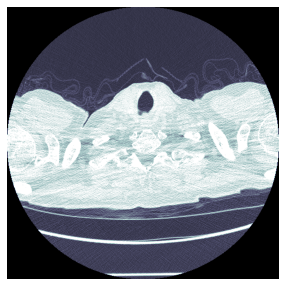

In [118]:
px = dcm.windowed(*dicom_windows.lungs)
show_image(px, cmap=plt.cm.bone)

In [120]:
dcm = Path(dcms[3].filename).dcmread()
fix_pxrepr(dcm)

<AxesSubplot:>

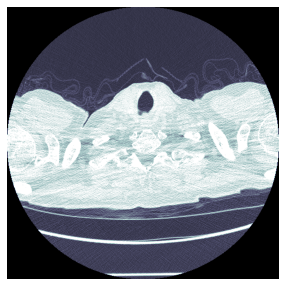

In [122]:
show_image(px, cmap=plt.cm.bone)

<AxesSubplot:>

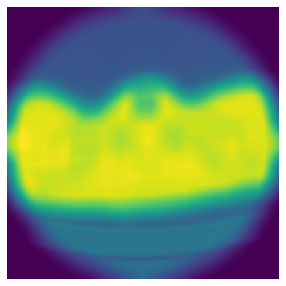

In [123]:
blurred = gauss_blur2d(px, 100)
show_image(blurred)

<AxesSubplot:>

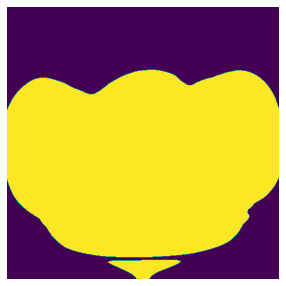

In [124]:
show_image(blurred>0.3)

1 frame per file
1 frame per file
1 frame per file
1 frame per file


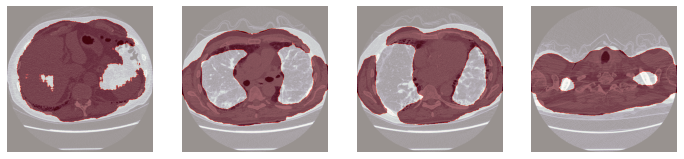

In [125]:
_,axs = subplots(1,4, imsize=3)
for i,ax in enumerate(axs.flat):
    dcms[i].show(dicom_windows.brain, ax=ax)
    show_image(dcms[i].mask_from_blur(dicom_windows.brain), cmap=plt.cm.Reds, alpha=0.6, ax=ax)


In [126]:
def pad_square(x):
    r,c = x.shape
    d = (c-r)/2
    pl,pr,pt,pb = 0,0,0,0
    if d>0: pt,pd = int(math.floor( d)),int(math.ceil( d))        
    else:   pl,pr = int(math.floor(-d)),int(math.ceil(-d))
    return np.pad(x, ((pt,pb),(pl,pr)), 'minimum')

def crop_mask(x):
    mask = x.mask_from_blur(dicom_windows.brain)
    bb = mask2bbox(mask)
    if bb is None: return
    lo,hi = bb
    cropped = x.pixel_array[lo[0]:hi[0],lo[1]:hi[1]]
    x.pixel_array = pad_square(cropped)

1 frame per file
1 frame per file


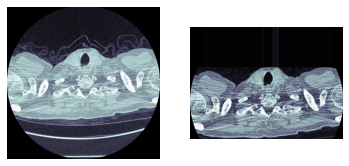

In [127]:
_,axs = subplots(1,2)
dcm.show(ax=axs[0])
crop_mask(dcm)
dcm.show(ax=axs[1]);

In [128]:
def get_samples():
    return get_dicom_files(path/'train'/'ID00007637202177411956430')

In [129]:
sample_dcms = tuple(Path(o).dcmread().scaled_px for o in get_samples())

<AxesSubplot:>

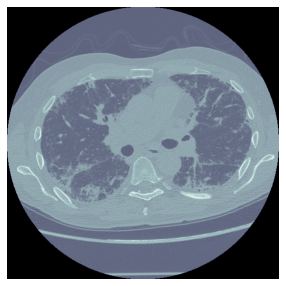

In [133]:
show_image(sample_dcms[1], cmap=plt.cm.bone)

In [134]:
samples = torch.stack(sample_dcms)

In [135]:
bins = samples.freqhist_bins()

In [142]:
# save for later
(path/'bins.pkl').save(bins)

In [143]:
def dcm_tfm(fn): 
    fn = Path(fn)
    try:
        x = fn.dcmread()
        fix_pxrepr(x)
    except Exception as e:
        print(fn,e)
        raise SkipItemException
    if x.Rows != 512 or x.Columns != 512: x.zoom_to((512,512))
    return x.scaled_px

To make it super fast, we'll do it in 3 steps:

* Create a multiprocess DataLoader that reads, fixes, and rescales the DICOMs, returning batches of size bs
* Loop through each batch, moving it to the GPU, and then using fastai's GPU-optimized masking, cropping, and resizing functions on the whole batch at once
* For each batch, save each image in it in parallel, using fastai's parallel function.


In [164]:
fns = get_samples()
dest = path/'train_jpg'
dest.mkdir(exist_ok=True)

bs = 64
dsrc = Datasets(fns, [[dcm_tfm], [os.path.basename]])
dl = TfmdDL(dsrc, bs=bs, num_workers=2)

In [303]:
def dest_fname(fname): return dest/Path(fname).with_suffix('.jpg')

def save_cropped_jpg(o, dest):
    fname,px = o
    px.save_jpg(dest_fname(fname), [dicom_windows.brain, dicom_windows.subdural], bins=bins)

In [ ]:
def parallel(f, items, *args, n_workers=defaults.cpus, total=None, progress=None, pause=0, **kwargs):
    "Applies `func` in parallel to `items`, using `n_workers`"
    if progress is None: progress = progress_bar is not None
    with ProcessPoolExecutor(n_workers, pause=pause) as ex:
        r = ex.map(f,items, *args, **kwargs)
        if progress:
            if total is None: total = len(items)
            r = progress_bar(r, total=total, leave=False)
        return L(r)

In [320]:
def process_batch(pxs, fnames, n_workers=4):
    pxs = to_device(pxs)
    masks = pxs.mask_from_blur(dicom_windows.lungs)
    bbs = mask2bbox(masks)
    gs = crop_resize(pxs, bbs, 256).cpu().squeeze()
#     parallel(save_cropped_jpg, list(zip(fnames, gs)), n_workers=n_workers, progress=True, dest=dest)
    with ProcessPoolExecutor(n_workers, pause=0) as ex:
        ex.map(save_cropped_jpg,list(zip(fnames, gs)), dest=dest)
#         if progress:
#             if total is None: total = len(items)
#             r = progress_bar(r, total=total, leave=False)

In [321]:
# test and time a single batch. It's ~100x faster on a GPU!
%time process_batch(*dl.one_batch(), n_workers=4)

KeyboardInterrupt: 

In [194]:
pxs,fnames = dl.one_batch()
pxs = to_device(pxs)
masks = pxs.mask_from_blur(dicom_windows.lungs)
bbs = mask2bbox(masks)
gs = crop_resize(pxs, bbs, 256).cpu().squeeze()

In [252]:
parallel??

In [ ]:
parallel(save_cropped_jpg, zip(fnames, gs), dest, n_workers=n_workers, progress=True)

In [232]:
save_cropped_jpg(next(zip(fnames,gs)), dest)

In [317]:
len(list(zip(fnames,gs)))

30

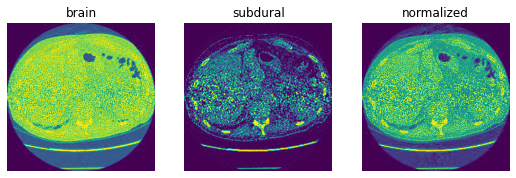

In [240]:
fn = dest.ls()[0]
im = Image.open(fn)
show_images(tensor(im).permute(2,0,1), titles=['brain','subdural','normalized'])

In [238]:
show_image??

In [313]:
list(zip(fnames, gs))

[('27.dcm',
  tensor([[-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          ...,
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.]])),
 ('15.dcm',
  tensor([[-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          ...,
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.]])),
 ('18.dcm',
  tensor([[-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
          [-3024., -3024., -3024.,  ..., -3024., -3024., -3024.],
    